# 6.3 Geographical Visualizations with Python

# Index
1. Importing Libraries and data
2. Data Wrangling
3. Cleaning Data
4. Choropleth Maps

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Make visuals appear in notebook
%matplotlib inline

In [3]:
# Imprt .json file
us_geo = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 6\Data\Original Data\us json file\us-states.json'

In [4]:
# Path to data fodler
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 6\Data\Prepared Data'

In [5]:
# Import Gun violence data
gv = pd.read_csv(os.path.join(path, 'gun violence clean.csv'))

In [6]:
#Check
gv.head()

,Unnamed: 0,incident_id,date,state,city_or_county,number_killed,number_injured,latitude,longitude
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330
2,2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377
3,3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569


# 2. Data Wrangling

In [7]:
# Dropping columns not needed
gv_2 = gv.drop(columns = ['Unnamed: 0'])

In [8]:
# Check
gv_2

,incident_id,date,state,city_or_county,number_killed,number_injured,latitude,longitude
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569
...,...,...,...,...,...,...,...,...
239672,1083142,3/31/2018,Louisiana,Rayne,0,0,NaN,NaN
239673,1083139,3/31/2018,Louisiana,Natchitoches,1,0,31.7537,-93.0836
239674,1083151,3/31/2018,Louisiana,Gretna,0,1,29.9239,-90.0442
239675,1082514,3/31/2018,Texas,Houston,1,0,29.7201,-95.6110


In [9]:
# Keeping only necessary columns
columns = ['incident_id', 'state', 'number_killed', 'number_injured']

In [10]:
# Subset
gv_geo = gv_2[columns]

In [11]:
gv_geo.head()

,incident_id,state,number_killed,number_injured
0,461105,Pennsylvania,0,4
1,460726,California,1,3
2,478855,Ohio,1,3
3,478925,Colorado,4,0
4,478959,North Carolina,2,2


# 3. Cleaning Data

In [12]:
# Duplicates
dups = gv_geo.duplicated()

In [13]:
dups.shape


(239677,)

No Duplicates

In [15]:
# Missing values
gv_geo.isnull().sum()

incident_id       0
state             0
number_killed     0
number_injured    0
dtype: int64

In [16]:
gv_geo.dtypes

incident_id        int64
state             object
number_killed      int64
number_injured     int64
dtype: object

# 
No missing values

<Axes: xlabel='number_killed', ylabel='Count'>

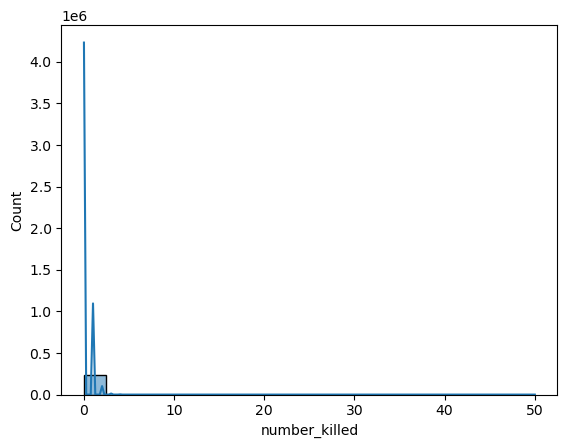

In [18]:
# Checking for extreme values
sns.histplot(gv_geo['number_killed'], bins = 20, kde = True)

<Axes: xlabel='number_injured', ylabel='Count'>

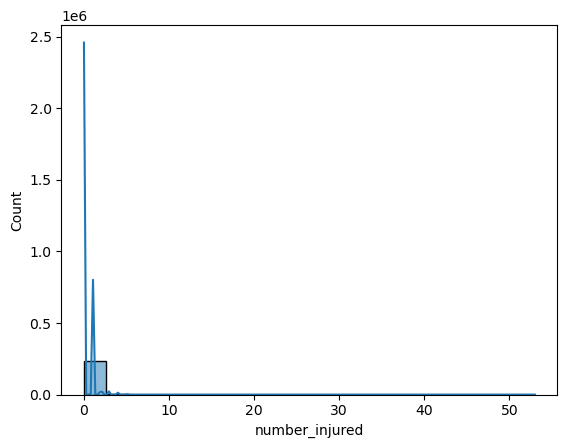

In [19]:
sns.histplot(gv_geo['number_injured'], bins = 20, kde = True)

#
There are no extreme values

# 4. Choropleth Maps

# 
Aggregating data to find sum per state

In [21]:
gv_sums = gv_geo.groupby(['state'], as_index=False)['number_killed', 'number_injured'].sum()

C:\Users\justi\AppData\Local\Temp\ipykernel_13640\3242979740.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gv_sums = gv_geo.groupby(['state'], as_index=False)['number_killed', 'number_injured'].sum()


In [22]:
gv_sums

,state,number_killed,number_injured
0,Alabama,1880,2998
1,Alaska,267,325
2,Arizona,1094,1096
3,Arkansas,773,1347
4,California,5562,7644
5,Colorado,796,1133
6,Connecticut,341,1258
7,Delaware,217,853
8,District of Columbia,459,1415
9,Florida,3909,7072


In [24]:
gv_incident_id = gv_geo.groupby(['state'], as_index=False)['incident_id'].count()

In [25]:
gv_incident_id

,state,incident_id
0,Alabama,5471
1,Alaska,1349
2,Arizona,2328
3,Arkansas,2842
4,California,16306
5,Colorado,3201
6,Connecticut,3067
7,Delaware,1685
8,District of Columbia,3195
9,Florida,15029


In [26]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = us_geo,
    data = gv_incident_id,
    columns = ['state', 'incident_id'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.8, line_opacity=0.3,
    legend_name = "Occurences").add_to(map)
folium.LayerControl().add_to(map)

map

In [27]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = us_geo,
    data = gv_sums,
    columns = ['State', 'Suspects Arrested'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.8, line_opacity=0.3,
    legend_name = "Occurences").add_to(map)
folium.LayerControl().add_to(map)

map

#
It seems that California, Florida, Illinois and Texas have the highest arrests for gun violence

# 
Question 8.
With this map I was able to answer the question "Is there more gun violence in any specific state/region?". It seems that California, Florida, Illinois and Texas have more gun violence incidents than the other states.

New Questions: 

Why do California, Florida, Illinois and Texas have more gun violence than other states?



#
Saving Maps

In [27]:
map.save('gv_incident_id.html')

In [28]:
map.save('gv_sums.html')